In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Read the data into variable

train = pd.read_csv('./final_project_data/sales_train.csv')
items = pd.read_csv('./final_project_data/items.csv')
item_categories = pd.read_csv('./final_project_data/item_categories.csv')
shops = pd.read_csv('./final_project_data/shops.csv')
test = pd.read_csv('./final_project_data/test.csv')

In [3]:
print(f'Shapes of data are:\n train:{train.shape}\n test:{test.shape}\n items:{items.shape}' +
     f'\n item_categories:{item_categories.shape} \n shops:{shops.shape}')

Shapes of data are:
 train:(2935849, 6)
 test:(214200, 3)
 items:(22170, 3)
 item_categories:(84, 2) 
 shops:(60, 2)


In [4]:
train_shops = train.shop_id.unique()
test_shops = test.shop_id.unique()
train_items = train.item_id.unique()
test_items = test.item_id.unique()

print(f'Total shops in train: {len(train_shops)}\t in test: {len(test_shops)} \n' +
      f'items in train: {len(train_items)} \t in test:{len(test_items)}. \n')
print(f'For test, the number of rows is (shops x item = {len(test_shops)*len(test_items)}),' +
      f' this is same as the number of rows {test.shape[0]}')

Total shops in train: 60	 in test: 42 
items in train: 21807 	 in test:5100. 

For test, the number of rows is (shops x item = 214200), this is same as the number of rows 214200


In [5]:
print(f'train has all shops in test? {set(test_shops.tolist()).issubset(set(train_shops.tolist()))}\n'+
      f'train has all items in test? {set(test_items.tolist()).issubset(set(train_items.tolist()))}')

train has all shops in test? True
train has all items in test? False


In [6]:
# Run this code if train have to have only the test shops and items
# Better approach would be fill the missing from train items with 0/mean/median

# train = train[train.item_id.isin(test_items)]
# train = train[train.shop_id.isin(test_shops)]


In [7]:
print(f"Null's in train dataset: {train.isnull().sum().sum()}")
print(f"Null's in test dataset: {test.isnull().sum().sum()}")

Null's in train dataset: 0
Null's in test dataset: 0


In [8]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [10]:
# Copy the original dataset to temp 
tn = train.copy()
ts = test.copy()

In [11]:
tn['split'] = tn['date'].str.split('.')
tn['year'] = tn['split'].map(lambda x: int(x[2]))
tn['year'].astype(np.int16)

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
2935844    2015
2935845    2015
2935846    2015
2935847    2015
2935848    2015
Name: year, Length: 2935849, dtype: int16

In [12]:
# train['date_block_num'].describe()

In [13]:
tn['date'] = pd.to_datetime(tn['date'], format = '%d.%m.%Y')
tn.sort_values(by=['date'], inplace=True)
print(f"The training data period is from {min(tn['date'])} to {max(tn['date'])}")

The training data period is from 2013-01-01 00:00:00 to 2015-10-31 00:00:00


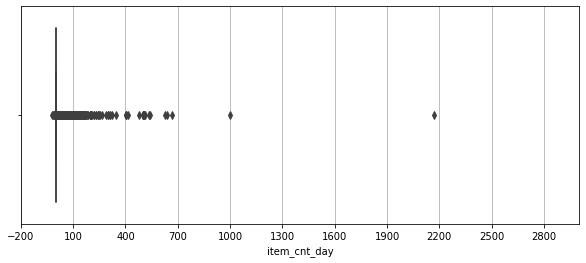

In [14]:
plt.figure(figsize=(10,4))
plt.xlim(-200, 3000)
plt.xticks(np.arange(-200, 3000, step=300))
plt.grid()
sns.boxplot(x=tn.item_cnt_day)

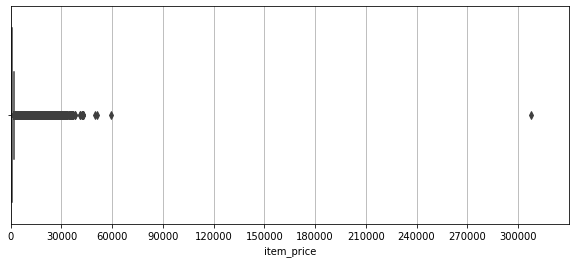

In [15]:
plt.figure(figsize=(10,4))
plt.xlim(0, 330000)
plt.xticks(np.arange(0, 330000, step=30000))
plt.grid()
sns.boxplot(x=tn.item_price)


In [16]:
tn['item_revenue'] = tn['item_price'] * tn['item_cnt_day']
tn['year'] = tn['date'].dt.year
tn['month'] = tn['date'].dt.month
tn['day'] = tn['date'].dt.day

# Include Categories
# We create the dictionary
item_cat = items[['item_id','item_category_id']].to_dict()['item_category_id']
tn['category'] = tn['item_id'].map(item_cat)

tn.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,split,year,item_revenue,month,day,category
49800,2013-01-01,0,18,5823,2500.0,1.0,"[01, 01, 2013]",2013,2500.0,1,1,35
29784,2013-01-01,0,27,5573,849.0,1.0,"[01, 01, 2013]",2013,849.0,1,1,2
35476,2013-01-01,0,7,1006,399.0,1.0,"[01, 01, 2013]",2013,399.0,1,1,67
8330,2013-01-01,0,19,17707,899.0,1.0,"[01, 01, 2013]",2013,899.0,1,1,19
57384,2013-01-01,0,14,19548,149.0,1.0,"[01, 01, 2013]",2013,149.0,1,1,40


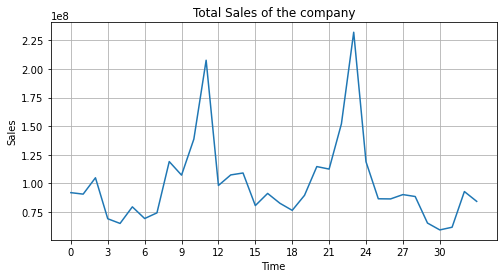

In [17]:
total_monthly_sales=tn.groupby(['date_block_num'])['item_revenue'].sum()
plt.figure(figsize=(8,4))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(np.arange(0, 33, step=3))
plt.grid()
plt.plot(total_monthly_sales)

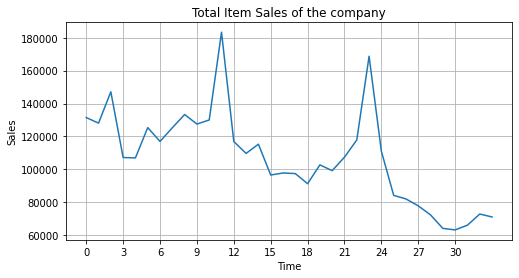

In [18]:
total_monthly_item_sales=tn.groupby(['date_block_num'])['item_cnt_day'].sum()
plt.figure(figsize=(8,4))
plt.title('Total Item Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(np.arange(0, 33, step=3))
plt.grid()
plt.plot(total_monthly_item_sales)

In [19]:
total_monthly_sales.head(10)

date_block_num
0    9.194709e+07
1    9.066571e+07
2    1.049327e+08
3    6.915429e+07
4    6.506531e+07
5    7.955041e+07
6    6.935060e+07
7    7.429797e+07
8    1.190819e+08
9    1.072416e+08
Name: item_revenue, dtype: float64

### Trend

Sales trend shows incresing sales at the end of year and increasing sales every year.

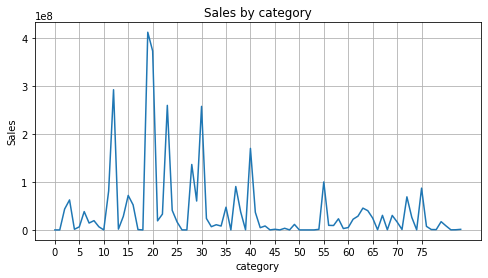

In [20]:
total_sales_by_category=tn.groupby(['category'])['item_revenue'].sum().reset_index()
plt.figure(figsize=(8,4))
plt.title('Sales by category')
plt.xlabel('category')
plt.ylabel('Sales')
plt.xticks(np.arange(0, 80, step=5))
plt.grid()
plt.plot(total_sales_by_category['category'],total_sales_by_category['item_revenue'])

In [21]:
total_monthly_sales_by_category=tn.groupby(['date_block_num','category'])['item_revenue'].sum().reset_index()

In [22]:
imp_category = total_monthly_sales_by_category.loc[
            total_monthly_sales_by_category['item_revenue'] > 1e8]

In [23]:
imp_category.index

Int64Index([], dtype='int64')

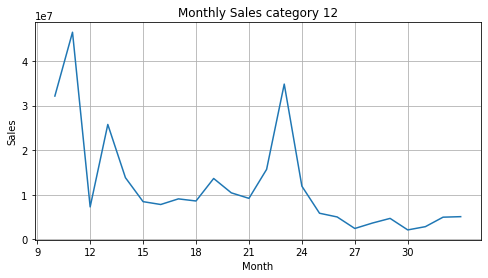

In [24]:
cat_12_monthly_sale = total_monthly_sales_by_category.loc[total_monthly_sales_by_category['category'] == 12]
plt.figure(figsize=(8,4))
plt.title('Monthly Sales category 12')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(np.arange(0, 33, step=3))
plt.grid()
plt.plot(cat_12_monthly_sale['date_block_num'],cat_12_monthly_sale['item_revenue'])

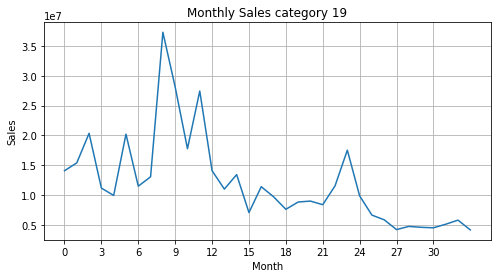

In [25]:
cat_19_monthly_sale = total_monthly_sales_by_category.loc[total_monthly_sales_by_category['category'] == 19]
plt.figure(figsize=(8,4))
plt.title('Monthly Sales category 19')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(np.arange(0, 33, step=3))
plt.grid()
plt.plot(cat_19_monthly_sale['date_block_num'],cat_19_monthly_sale['item_revenue'])

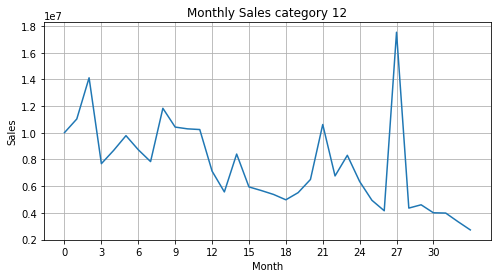

In [26]:
cat_30_monthly_sale = total_monthly_sales_by_category.loc[total_monthly_sales_by_category['category'] == 30]
plt.figure(figsize=(8,4))
plt.title('Monthly Sales category 12')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(np.arange(0, 33, step=3))
plt.grid()
plt.plot(cat_30_monthly_sale['date_block_num'],cat_30_monthly_sale['item_revenue'])

### Categories

Every category looks to have a different trend

In [27]:
# years = [2013, 2014, 2015]
# months = [[n for n in range (1,13)], [n for n in range (1,13)], [n for n in range (1,11)]]


In [28]:
# tn_month = tn[(tn["year"] == years[0]) & (tn["month"] == months[0][0])]
# tn_month.head()

In [29]:
# k=0
# for i in range(len(years)):
#     for j in range(len(months[i])):
#         k +=1
#         print(k)

In [30]:
tn_monthly = tn.groupby(['date_block_num', 'shop_id', 'item_id']).agg(
    {'item_cnt_day':'sum', 'item_revenue':'sum', 'month':'mean', 'year':'mean'})

In [31]:
tn_monthly.reset_index(inplace=True)
tn_monthly

,date_block_num,shop_id,item_id,item_cnt_day,item_revenue,month,year
0,0,0,32,6.0,1326.0,1,2013
1,0,0,33,3.0,1041.0,1,2013
2,0,0,35,1.0,247.0,1,2013
3,0,0,43,1.0,221.0,1,2013
4,0,0,51,2.0,257.0,1,2013
...,...,...,...,...,...,...,...
1609119,33,59,22087,6.0,714.0,10,2015
1609120,33,59,22088,2.0,238.0,10,2015
1609121,33,59,22091,1.0,179.0,10,2015
1609122,33,59,22100,1.0,629.0,10,2015


In [32]:
# # Another approach
# monthly_sales=train.groupby(["date_block_num","shop_id","item_id"])[
#     "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

# ## Lets break down the line of code here:
# # aggregate by date-block(month),shop_id and item_id
# # select the columns date,item_price and item_cnt(sales)
# # Provide a dictionary which says what aggregation to perform on which column
# # min and max on the date
# # average of the item_price
# # sum of the sales